**2019-07-25**: Playing with Sargent and Stachurowski's QuantEcon: <https://quantecon.org>

&nbsp;

----

## Solow Growth Model

Factor accumulation:

>(1) $ \frac{dL_t}{dt} = nL_t $

>(2) $ \frac{dE_t}{dt} = gE_t $

>(3) $ \frac{dK_t}{dt} = sY_t - δK_t $

Production function:

>(4) $ Y_t = K_t^α(L_tE_t)^{(1-α)} $

Definition of capital-output ratio:

>(5) $ κ_t = \frac{K_t}{Y_t} $

Solving for the rate of change of the capital-output ratio

>(6) $ Y_t = κ_t^{(α/(1-α))}(L_tE_t) $

>(7) $ \frac{1}{K_t}\frac{dK_t}{dt} = \frac{s}{κ_t} - δ $

>(8) $ \frac{1}{Y_t}\frac{dY_t}{dt} = α \left( \frac{1}{K_t}\frac{dK_t}{dt} \right) + (1-α)(n+g) $

>(9) $ \frac{1}{κ_t}\frac{dκ_t}{dt} = \frac{1}{K_t}\frac{dK_t}{dt} - α \left( \frac{1}{K_t}\frac{dK_t}{dt} \right) - (1-α)(n+g) $

>(10) $ \frac{1}{κ_t}\frac{dκ_t}{dt} =  (1- α) \left( \frac{1}{K_t}\frac{dK_t}{dt}  \right) - (1-α)(n+g) $

>(11) $ \frac{1}{κ_t}\frac{dκ_t}{dt} =  (1- α) \left( \frac{s}{κ_t} - δ  \right) - (1-α)(n+g) $

>(12) $ \frac{dκ_t}{dt} =  (1- α) \left( s - (n+g+δ)κ_t  \right) $

Integrating:

>(13) $ κ_t = \frac{s}{n+g+δ} + e^{-(1-α)(n+g+δ)t} \left[ κ_0 - \frac{s}{n+g+δ)}  \right]   $

Discretizing for a difference model:

>(14) $ κ_{t+1} = κ_t + \left[ \frac{1 - e^{-(1-α)(n+g+δ)}}{n+g+δ} \right] \left( s - (n+g+δ)κ_t  \right) $

>(15) $ 1 - α' = (1 - α) \left[ 1 - \frac{(1-α)(n+g+δ)}{2} + \frac{(1-α)^2(n+g+δ)^2}{6} - ... \right]   $

>(16) $ κ_{t+1} = κ_t + (1- α') \left( s - (n+g+δ)κ_t  \right)  $

In [1]:
class SolowKappa:

# Implements the Solow growth model calculation of the
# capital-output ratio κ and other model variables
# using the update rule:
#
#    κ_{t+1} = κ_t + (1- α) ( s - (n+g+δ)κ_t )

    def __init__(self, n=0.01,   # population growth rate
                       s=0.20,   # savings rate
                       δ=0.03,   # depreciation rate
                       α=1/3,    # share of labor
                       g=0.01,   # productivity
                       κ=1.0,    # current capital-labor ratio
                       E=1.0,    # current efficiency of labor
                       L=1.0):   # current labor force  

        self.n, self.s, self.δ, self.α, self.g = n, s, δ, α, g
        self.κ, self.E, self.L = κ, E, L
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L

    def calc_next_period_kappa(self):
        "Calculate the next period capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, g = self.n, self.s, self.δ, self.α, self.g
        # Apply the update rule
        return (self.κ + (1 - α)*( s - (n+g+δ)*self.κ ))

    def calc_next_period_E(self):
        "Calculate the next period efficiency of labor."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, g = self.n, self.s, self.δ, self.α, self.g
        # Apply the update rule
        return (self.E * np.exp(g))

    def calc_next_period_L(self):
        "Calculate the next period labor force."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, g = self.n, self.s, self.δ, self.α, self.g
        # Apply the update rule
        return (self.L*np.exp(n))

    def update(self):
        "Update the current state."
        self.κ =  self.calc_next_period_kappa()
        self.E =  self.calc_next_period_E()
        self.L =  self.calc_next_period_L()
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L

    def steady_state(self):
        "Compute the steady state value of the capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, g = self.n, self.s, self.δ, self.α, self.g
        # Compute and return steady state
        return (s /(n + g + δ))

    def generate_kappa_sequence(self, t):
        "Generate and return time series of length t for the model."
        path = []
        for i in range(t):
            path.append(self.κ)
            self.update()
        return path
    
    def generate_E_sequence(self, t):
        "Generate and return a time series of length t for the efficiency of labor."
        path = []
        for i in range(t):
            path.append(self.E)
            self.update()
        return path
    
    def generate_L_sequence(self, t):
        "Generate and return a time series of length t for the labor force."
        path = []
        for i in range(t):
            path.append(self.L)
            self.update()
        return path
    
    def generate_K_sequence(self, t):
        "Generate and return a time series of length t for the capital stock."
        path = []
        for i in range(t):
            path.append(self.K)
            self.update()
        return path

    def generate_Y_sequence(self, t):
        "Generate and return a time series of length t for the capital stock."
        path = []
        for i in range(t):
            path.append(self.Y)
            self.update()
        return path
    
    def generate_y_sequence(self, t):
        "Generate and return a time series of length t for the capital stock."
        path = []
        for i in range(t):
            path.append(self.y)
            self.update()
        return path

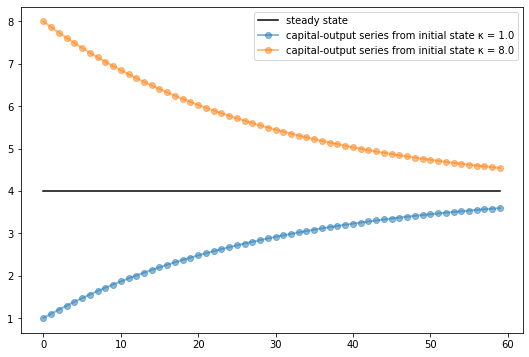

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 60

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady-state value of the capital-output ratio
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital-output series from initial state κ = {s.κ}'
    ax.plot(s.generate_kappa_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

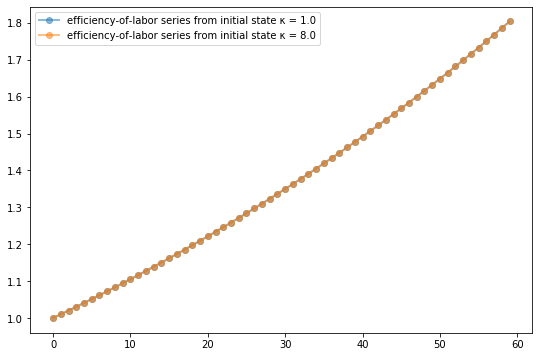

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s1, s2:
    lb = f'efficiency-of-labor series from initial state κ = {s.κ}'
    ax.plot(s.generate_E_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

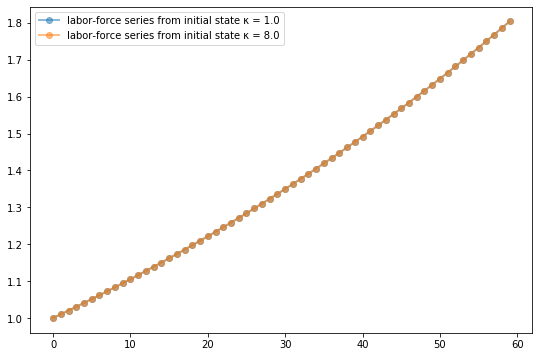

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s1, s2:
    lb = f'labor-force series from initial state κ = {s.κ}'
    ax.plot(s.generate_L_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

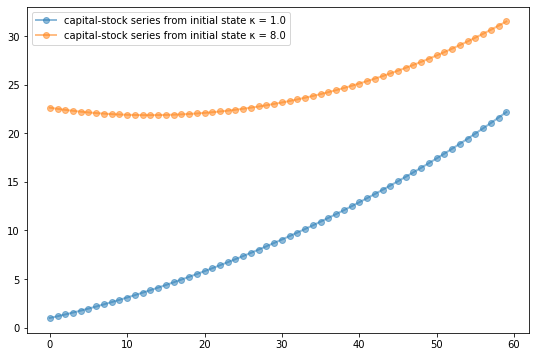

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital-stock series from initial state κ = {s.κ}'
    ax.plot(s.generate_K_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

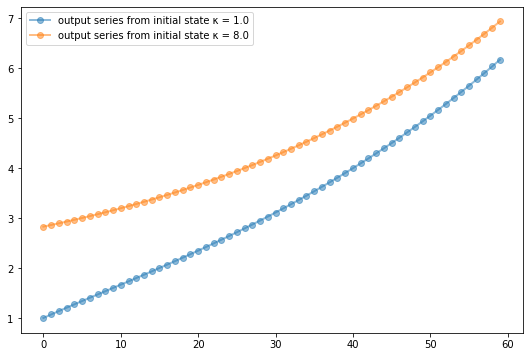

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s1, s2:
    lb = f'output series from initial state κ = {s.κ}'
    ax.plot(s.generate_Y_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

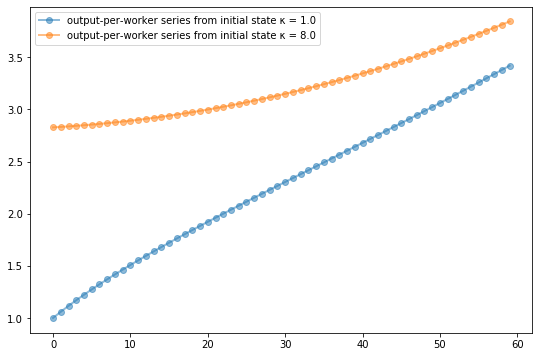

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s1 = SolowKappa()
s2 = SolowKappa(κ=8.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s1, s2:
    lb = f'output-per-worker series from initial state κ = {s.κ}'
    ax.plot(s.generate_y_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)

ax.legend()
plt.show()

## <font color="880000"> Solow Growth Model: Capital-Output Ratio as State Variable</font>

<img src="https://tinyurl.com/20190119a-delong" width="300" style="float:right" />

### <font color="000088">Catch Our Breath—Further Notes:</font>

<br clear="all" />

----

* Weblog Support 
* nbViewer 

&nbsp;

----